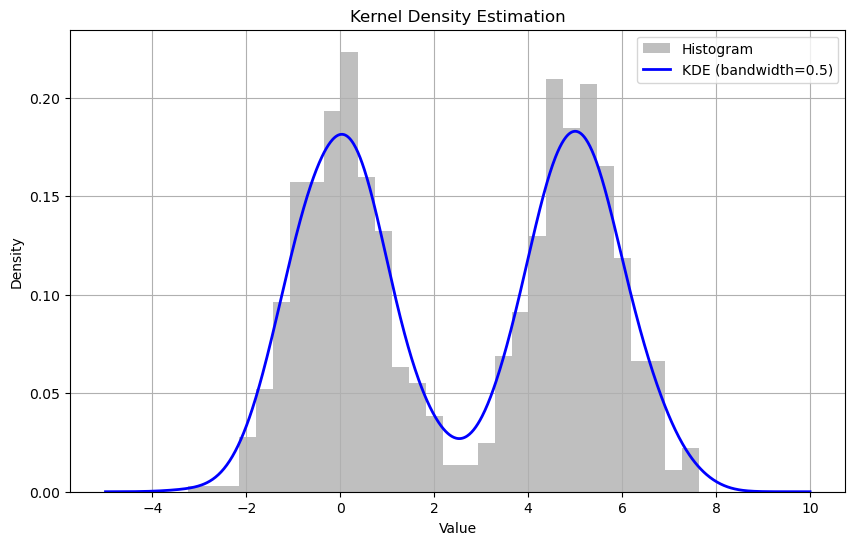

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

np.random.seed(42)
data = np.concatenate([np.random.normal(0, 1, 500), np.random.normal(5, 1, 500)])

x_grid = np.linspace(-5, 10, 1000)

bandwidth = 0.5 
kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
kde.fit(data[:, None])

log_density = kde.score_samples(x_grid[:, None]) 
density = np.exp(log_density)

plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.5, color='gray', label='Histogram')
plt.plot(x_grid, density, color='blue', label=f'KDE (bandwidth={bandwidth})', lw=2)
plt.title('Kernel Density Estimation')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


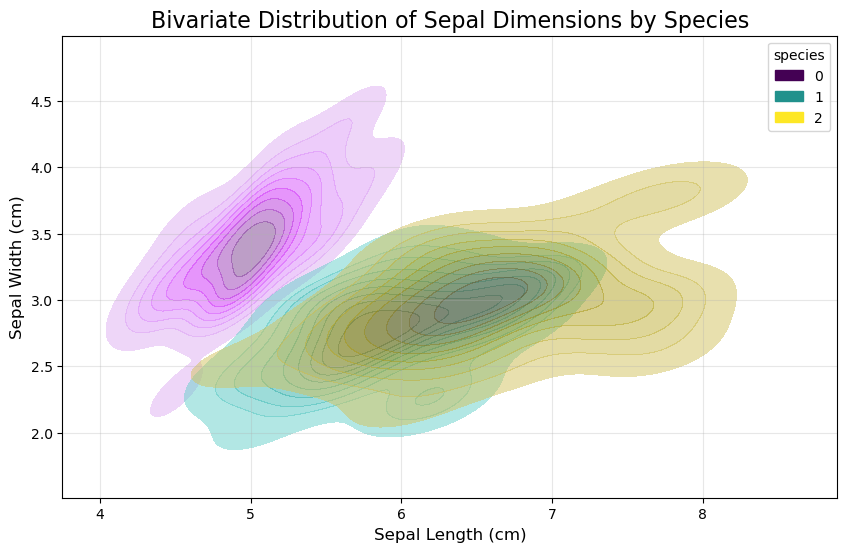

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['species'] = iris.target


x_feature = iris.feature_names[0]
y_feature = iris.feature_names[1] 

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=data,
    x=x_feature,
    y=y_feature,
    hue='species',
    fill=True,
    alpha=0.5,
    common_norm=False,
    palette='viridis'
)

plt.title("Bivariate Distribution of Sepal Dimensions by Species", fontsize=16)
plt.xlabel("Sepal Length (cm)", fontsize=12)
plt.ylabel("Sepal Width (cm)", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()


In [5]:
pip install geopandas



  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/94/8d/24f21e6a93ca418231aee3bddade7a0766c89c523832f29e08a8860f83e6/pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/26/0c/b084e8839a117eaad8cb4fbaa81bbb24c6f183de0ee95c6c4e2770ab6f09/pyproj-3.7.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/b1/5a/6a67d929c467a1973b6bb9f0b00159cc343b02bf9a8d26db1abd2f87aa23/shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------------------ --------------------- 153.6/323.6 kB 4.6 MB/s eta 0:00:01
 

In [12]:
pip install bokeh


Note: you may need to restart the kernel to use updated packages.


Using data directory: C:\Users\saiad\.bokeh\data
Skipping 'CGM.csv' (checksum match)
Skipping 'US_Counties.zip' (checksum match)
Skipping 'us_cities.json' (checksum match)
Skipping 'unemployment09.csv' (checksum match)
Skipping 'AAPL.csv' (checksum match)
Skipping 'FB.csv' (checksum match)
Skipping 'GOOG.csv' (checksum match)
Skipping 'IBM.csv' (checksum match)
Skipping 'MSFT.csv' (checksum match)
Skipping 'WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip' (checksum match)
Skipping 'gapminder_fertility.csv' (checksum match)
Skipping 'gapminder_population.csv' (checksum match)
Skipping 'gapminder_life_expectancy.csv' (checksum match)
Skipping 'gapminder_regions.csv' (checksum match)
Skipping 'world_cities.zip' (checksum match)
Skipping 'airports.json' (checksum match)
Skipping 'movies.db.zip' (checksum match)
Skipping 'airports.csv' (checksum match)
Skipping 'routes.csv' (checksum match)
Skipping 'haarcascade_frontalface_default.xml' (checksum match)
Skipping 'SampleSuperstore.csv.zip' (chec

KeyError: 'country'

In [4]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.sampledata.world_cities import data as cities_data

source = ColumnDataSource(data=dict(
    lat=cities_data["lat"],
    lon=cities_data["lng"],
    city=cities_data["name"]
))

p = figure(
    title="World Cities",
    x_axis_label="Longitude",
    y_axis_label="Latitude",
    tools="pan, wheel_zoom, reset, hover",
    tooltips=[("City", "@city")],
    width=900,
    height=500
)

p.circle(
    x="lon", y="lat", source=source,
    size=5, color="blue", alpha=0.7
)

show(p)


In [21]:
!pip install bokeh networkx geopandas





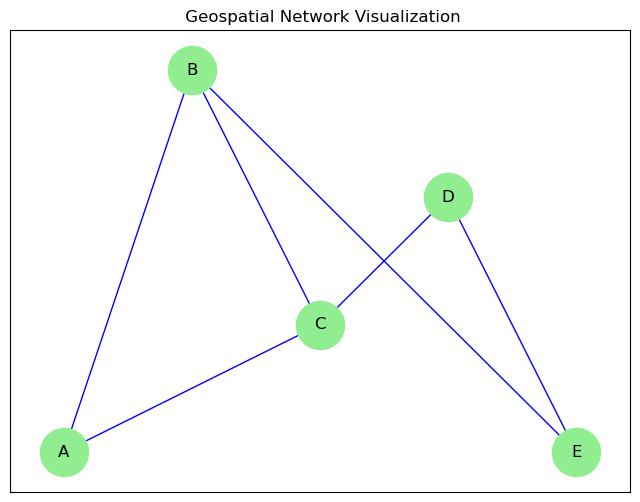

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

locations = {
    "A": (1, 1),
    "B": (2, 4),
    "C": (3, 2),
    "D": (4, 3),
    "E": (5, 1)
}
for node, pos in locations.items():
    G.add_node(node, pos=pos)

G.add_edges_from([
    ("A", "B"), ("B", "C"), ("C", "D"), ("D", "E"), ("A", "C"), ("B", "E")
])

pos = nx.get_node_attributes(G, 'pos')

plt.figure(figsize=(8, 6))
nx.draw_networkx(
    G, pos, with_labels=True, node_color='lightgreen', edge_color='blue', node_size=1200
)
plt.title(" Geospatial Network Visualization")
plt.show()


In [3]:
import requests
from bs4 import BeautifulSoup
from PIL import Image
from io import BytesIO
import os

def fetch_and_save_image(image_url, save_path="downloaded_image.png"):
    try:
        response = requests.get(image_url)
        response.raise_for_status()  

        img = Image.open(BytesIO(response.content))
        img.save(save_path)
        print(f"Image saved successfully at {save_path}")

    except requests.exceptions.RequestException as e:
        print(f"Error fetching image: {e}")
    except IOError as e:
        print(f"Error saving image: {e}")

def parse_html_and_search(url, keyword=None):
    try:
        response = requests.get(url)
        response.raise_for_status()

        soup = BeautifulSoup(response.content, 'html.parser')

        title = soup.title.string if soup.title else "No title found"
        print(f"Page Title: {title}")

        links = soup.find_all('a', href=True)
        print(f"Found {len(links)} links on the page.")

        if keyword:
            text = soup.get_text().lower()
            occurrences = text.count(keyword.lower())
            print(f"The keyword '{keyword}' was found {occurrences} times on the page.")

        print("First 5 links:")
        for link in links[:5]:
            print(link['href'])

    except requests.exceptions.RequestException as e:
        print(f"Error fetching HTML: {e}")

def main():

    image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Example.jpg/800px-Example.jpg"
    fetch_and_save_image(image_url, save_path="example_image.jpg")

    webpage_url = "https://en.wikipedia.org/wiki/Python_(programming_language)"
    parse_html_and_search(webpage_url, keyword="Python")

if __name__ == '__main__':
    main()


Error fetching image: 403 Client Error: Forbidden. Please comply with the User-Agent policy: https://meta.wikimedia.org/wiki/User-Agent_policy for url: https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Example.jpg/800px-Example.jpg
Page Title: Python (programming language) - Wikipedia
Found 2316 links on the page.
The keyword 'Python' was found 661 times on the page.
First 5 links:
#bodyContent
/wiki/Main_Page
/wiki/Wikipedia:Contents
/wiki/Portal:Current_events
/wiki/Special:Random


In [4]:
import requests
import xml.etree.ElementTree as ET

def fetch_exchange_rates():
    
    try:
        url = "https://www.ecb.europa.eu/stats/eurofxref/eurofxref-daily.xml"
        
        response = requests.get(url)
        response.raise_for_status() 
        
        root = ET.fromstring(response.content)
        
        namespaces = {'gesmes': 'http://www.gesmes.org/xml/2002-08-01', 
                      '': 'http://www.ecb.int/vocabulary/2002-08-01/eurofxref'}
        
        cube = root.find('.//Cube/Cube', namespaces)
        
        if cube is not None:
            print("Exchange Rates (Base: EUR):")
            for rate in cube.findall('Cube', namespaces):
                currency = rate.attrib.get('currency')
                value = rate.attrib.get('rate')
                print(f"  {currency}: {value}")
        else:
            print("No exchange rate data found.")
    
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data: {e}")
    except ET.ParseError:
        print("Error parsing XML data.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

def main():
    fetch_exchange_rates()

if __name__ == "__main__":
    main()


Exchange Rates (Base: EUR):
  USD: 1.0527
  JPY: 159.74
  BGN: 1.9558
  CZK: 25.098
  DKK: 7.4578
  GBP: 0.82555
  HUF: 411.15
  PLN: 4.2678
  RON: 4.9713
  SEK: 11.5335
  CHF: 0.9267
  ISK: 145.90
  NOK: 11.7315
  TRY: 36.6838
  AUD: 1.6452
  BRL: 6.3811
  CAD: 1.4908
  CNY: 7.6354
  HKD: 8.1858
  IDR: 16709.98
  ILS: 3.7661
  INR: 89.3525
  KRW: 1507.31
  MXN: 21.2298
  MYR: 4.6614
  NZD: 1.8083
  PHP: 61.050
  SGD: 1.4118
  THB: 35.550
  ZAR: 18.8204
